# Compare IMU noises using Allan deviation

References


### TODO

- to finish...

  
### results

#### OAKLight_BMI270_30mn_SR200_motorOn_29042024

    accel_veloci_randwalk_x: 8.57e-03
    accel_veloci_randwalk_y = 1.76e-02
    accel_veloci_randwalk_z = 7.63e-03
    acceleration_randwalk_x = 9.84e-04 m/s²/√s
    acceleration_randwalk_y = 1.65e-04 m/s²/√s
    acceleration_randwalk_z = 3.95e-04 m/s²/√s
    gyro_angle_randwalk_x: 7.31e-03
    gyro_angle_randwalk_y = 1.54e-02
    gyro_angle_randwalk_z = 6.29e-03
    gyro_rate_randwalk_x = 1.71e-03 rad/s/√s
    gyro_rate_randwalk_y = 1.20e-04 rad/s/√s
    gyro_rate_randwalk_z = 5.37e-04 rad/s/√s
    
    for Kalibr: 
    
    Average accel_veloci_randwalk(Na, σba) or noise density = 1.13e-02 m/s/√s or 0.68 m/s/√hr (m/s/sqrt(hour))
    Average acceleration_randwalk (Ka, σa)= 5.14e-04 m/s²/√s
    Average gyro_angle_randwalk (Ng, σbg) or noise density = 9.67e-03 rad/√s or 3.3e+01 °/√hr (deg/sqrt(hour))
    Average gyro_rate_randwalk  (Kg, σg) = 7.89e-04 rad/s/√s
    
    for VINS (15x the above results): 
    
    acc_n: 0.1691
    gyr_n: 0.1450
    acc_w: 0.0077
    gyr_w: 0.0118


    acc_n: 0.1691
    gyr_n: 0.0043
    acc_w: 0.0077
    gyr_w: 0.0001

#### OAKLight_BMI270_60mn_SR200_motorOn_03052024

    for VINS (15x the above results): 

    acc_n: 0.0594
    gyr_n: 0.0022
    acc_w: 0.0202
    gyr_w: 0.0002

#### OAKLight_BMI270_90mn_SR200_yUp

    accel_veloci_randwalk_x: 1.09e-03
    accel_veloci_randwalk_y = 1.19e-03
    accel_veloci_randwalk_z = 1.16e-03
    acceleration_randwalk_x = 1.25e-04 m/s²/√s
    acceleration_randwalk_y = 2.82e-04 m/s²/√s
    acceleration_randwalk_z = 1.01e-03 m/s²/√s
    gyro_angle_randwalk_x: 8.59e-05
    gyro_angle_randwalk_y = 8.65e-05
    gyro_angle_randwalk_z = 8.19e-05
    gyro_rate_randwalk_x = 8.04e-05 rad/s/√s
    gyro_rate_randwalk_y = 2.71e-05 rad/s/√s
    gyro_rate_randwalk_z = 1.99e-04 rad/s/√s
    
    for Kalibr: 
    
    Average accel_veloci_randwalk(Na, σba) or noise density = 1.15e-03 m/s/√s or 0.069 m/s/√hr (m/s/sqrt(hour))
    Average acceleration_randwalk (Ka, σa)= 4.72e-04 m/s²/√s
    Average gyro_angle_randwalk (Ng, σbg) or noise density = 8.48e-05 rad/√s or 0.29 °/√hr (deg/sqrt(hour))
    Average gyro_rate_randwalk  (Kg, σg) = 1.02e-04 rad/s/√s
    
    for VINS (15x the above results): 
    
    acc_n: 0.0172
    gyr_n: 0.0013
    acc_w: 0.0071
    gyr_w: 0.0015

#### Default Values from VINS

    acc_n: 0.1          # accelerometer measurement noise standard deviation. #0.2   0.04
    gyr_n: 0.01         # gyroscope measurement noise standard deviation.     #0.05  0.004
    acc_w: 0.001         # accelerometer bias random work noise standard deviation.  #0.002
    gyr_w: 0.0001       # gyroscope bias random work noise standard deviation.     #4.0e-5

In [10]:
%matplotlib inline
# plot the gyroscope historgram for few seconds of data
# https://stackoverflow.com/questions/29208440/fit-a-distribution-to-a-histogram
# https://stackoverflow.com/questions/70164620/how-to-gaussian-fit-histogram
# For gyro input in rad/s, the FWHM will be in rad/s
# TODO find relation between sigma and FWHM
import os # for file manipulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
from scipy import signal


got the sampling rate from filename, FS = 200.0


In [49]:
HOME = os.getenv("HOME")
PATH2FILE = HOME + '/Data/Drones/IMU/'

#CSV_FILENAME = 'imu_oakdpro_1hr_28032024.csv'
# CSV_FILENAME = 'imu_oak_BNO086_6mn_gyroSR400_accSR500_yDown.csv'
# CSV_FILENAME = 'oak_BNO086_6mn_gyroSR400_accSR500_level.csv'
# CSV_FILENAME = 'oak_BNO086_6mn_gyroSR400_accSR500_xUp.csv'

# CSV_FILENAME = 'oak_BNO086_6mn_gyroSR400_accSR500_yDown.csv'
# CSV_FILENAME = 'oak_BNO086_30mn_gyrocalSR400_acclinSR500_level.csv'
# CSV_FILENAME = 'oak_BNO086_6mn_gyroSR400_accSR500_yUp.csv'
# CSV_FILENAME = 'oak_BNO086_6mn_gyroSR400_accSR500_zUp.csv'
# CSV_FILENAME = 'oak_BNO086_6mn_gyroSR400_accSR500_zDown.csv'
# CSV_FILENAME = 'imu_oak_BNO086_6mn_gyroSR400_accSR500.csv'
# CSV_FILENAME = 'imu_oak_BNO086_6mn_gyroSR100_accSR125.csv' 
# CSV_FILENAME = HOME+'/Data/Drones/IMU/imu_oak_BNO086_2hr_02042024.csv'
# MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_90mn_SR200_Static_yUp' 
# MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_30mn_SR200_motorOn_29042024' 
# MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_60mn_SR200_motorOn_03052024' 
MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_2mn_SR200_CartRolling_yUp'
# MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_2mn_SR200_FlightManual_yUp'
# old name: 'OAKLight_BMI270_90mn_gyroSR250_accSR250_yUp'
CSV_FILENAME = PATH2FILE + MEAS_FILENAME_NO_EXT + '.csv' 
# some string manip
split_btwn__ = MEAS_FILENAME_NO_EXT.split('_')
CAM_NAME = split_btwn__[0]
IMU_NAME = split_btwn__[1]
MEAS_DURATION = split_btwn__[3]
IMU_ORIENTATION = split_btwn__[-1]
TEST_CONFIG = split_btwn__[-2] # how the test was conducted (in flight, static....)

# get the sampling rate from file name
try:
    sr = MEAS_FILENAME_NO_EXT.split('SR')[1]
    sr = (float)(sr.split('_')[0])
    FS = sr
    print(f'got the sampling rate from filename, FS = {FS}')
except:    
    FS = 200 # Sample rate [Hz] # this is obtained from the measured data
    print(f'This is the sampling rate: FS = {FS}\n Make sure it is correct!')

FIG_FILENAME_BASE = IMU_NAME + '_' + TEST_CONFIG
SAVE_FIG = True
FIG_FMT = 'svg'
NOISE_PARAM_UNIT = 'rad'
ANGLE_UNIT_FOR_NOISE = 'rad' # or 'deg'
VELOCITY_UNIT_FOR_NOISE = 'm/s' # or e.g. 'cm/s'
ACCELERATION_UNIT_FOR_NOISE = 'm/s²' # or 'ug'
ACCELERATION_UNIT = 'm/s²' # or 'g'
# printings and formatting, conversion factors
# m/s² to μg
MS2_TO_MICROG = 1e6 / 9.81
PRECI= 2
TYPE = "e" # e: exponential notation
TS = 1.0 / FS
# NB_SAMPLE = 1000 # nb of samples to take from the input data (csv file) for the historgram
NB_SAMPLE = 24000 # 24000 is 2mn of data at 200Hz

DEG_2_RAD = np.pi / 180.0
RAD_2_DEG = 180.0 / np.pi
NBINS = 30 # number of bins for the histogram
# LOAD_SAMPLE = 'all'
LOAD_SAMPLE = 'start'

got the sampling rate from filename, FS = 200.0


In [53]:
# TODO: parameter to load samples within the array, not necessarily at that begining or end
def load_single_meas_file(meas_file_name_no_ext ='',sample_load_type = 'start',nb_sample_to_load = 24000):
    HOME = os.getenv("HOME")
    PATH2FILE = HOME + '/Data/Drones/IMU/'
    if meas_file_name_no_ext == '':
        meas_file_name_no_ext = 'OAKLight_BMI270_60mn_SR200_motorOn_03052024' 

    CSV_FILENAME = PATH2FILE + meas_file_name_no_ext + '.csv' 
    # some string manip
    split_btwn__ = meas_file_name_no_ext.split('_')
    CAM_NAME = split_btwn__[0]
    IMU_NAME = split_btwn__[1]
    MEAS_DURATION = split_btwn__[3]
    IMU_ORIENTATION = split_btwn__[-1]
    TEST_CONFIG = split_btwn__[-2] # how the test was conducted (in flight, static....)
    
    # get the sampling rate from file name
    try:
        sr = meas_file_name_no_ext.split('SR')[1]
        sr = (float)(sr.split('_')[0])
        FS = sr
        print(f'got the sampling rate from filename, FS = {FS}')
    except:    
        FS = 200 # Sample rate [Hz] # this is obtained from the measured data
        print(f'This is the sampling rate: FS = {FS}\n Make sure it is correct!')
    
    FIG_FILENAME_BASE = IMU_NAME + '_' + TEST_CONFIG

    NB_SAMPLE = nb_sample_to_load # 24000 is 2mn of data at 200Hz
    
    DEG_2_RAD = np.pi / 180.0
    RAD_2_DEG = 180.0 / np.pi
    LOAD_SAMPLE = sample_load_type
    # Load CSV into np array (take few seconds so put in a separate cell)
    dataArr = np.genfromtxt(CSV_FILENAME, delimiter=',')


    
    # Separate into arrays and select a slice of the input data
    if LOAD_SAMPLE == 'all':
        acc_ts = dataArr[:, 0]  # time stamp for acceleration, second
        accx = dataArr[:, 1]  # m/s²
        accy = dataArr[:, 2]
        accz = dataArr[:, 3]
        ts = dataArr[:, 4]  # time stamp, second
        gx = dataArr[:, 5]  # (rad/s)
        gy = dataArr[:, 6]
        gz = dataArr[:, 7]
    elif LOAD_SAMPLE == 'start':
        acc_ts = dataArr[:NB_SAMPLE, 0]  # time stamp for acceleration, second
        accx = dataArr[:NB_SAMPLE, 1]  # m/s²
        accy = dataArr[:NB_SAMPLE, 2]
        accz = dataArr[:NB_SAMPLE, 3]
        ts = dataArr[:NB_SAMPLE, 4]  # time stamp, second
        gx = dataArr[:NB_SAMPLE, 5]  # (rad/s)
        gy = dataArr[:NB_SAMPLE, 6]
        gz = dataArr[:NB_SAMPLE, 7]
    elif LOAD_SAMPLE == 'end':
        acc_ts = dataArr[-NB_SAMPLE:, 0]  # time stamp for acceleration, second
        accx = dataArr[-NB_SAMPLE:, 1]  # m/s²
        accy = dataArr[-NB_SAMPLE:, 2]
        accz = dataArr[-NB_SAMPLE:, 3]
        ts = dataArr[-NB_SAMPLE:, 4]  # time stamp, second
        gx = dataArr[-NB_SAMPLE:, 5]  # (rad/s)
        gy = dataArr[-NB_SAMPLE:, 6]
        gz = dataArr[-NB_SAMPLE:, 7]

    if ANGLE_UNIT_FOR_NOISE == 'deg':
        gx = gx * (180.0 / np.pi)  # [deg/s]
        gy = gy * (180.0 / np.pi)
        gz = gz * (180.0 / np.pi)

    
    # get some parameters about the data collection
    dataArr_shape = dataArr.shape
    tot_nb_sample = dataArr_shape[0]
    print(f'Input array shape: {dataArr_shape}')
    print(f'total number of samples in the whole array: {tot_nb_sample}')
    print(f'number of samples to use for analysis: {len(acc_ts)}')      
    return (accx,accy,accz),(gx,gy,gz),FS,FIG_FILENAME_BASE, IMU_NAME,TEST_CONFIG

In [58]:
# input the file name and it returns the noise density for both accelerometers and gyro
# default options
def noise_density_for_config(meas_file_name_no_ext =''):
    acc_xyz,gyr_xyz,FS,FIG_FILENAME_BASE, IMU_NAME,TEST_CONFIG = \
        load_single_meas_file(meas_file_name_no_ext,sample_load_type = 'start',nb_sample_to_load = 24000)
    nd_acc_avg = noise_density_N(acc_xyz, fs_actual = FS, meas_type = 'acc',save_fig = False, fig_name = FIG_FILENAME_BASE)
    nd_gyr_avg = noise_density_N(gyr_xyz, fs_actual = FS, meas_type = 'gyr',save_fig = False, fig_name = FIG_FILENAME_BASE)
    print(f'{IMU_NAME}, {TEST_CONFIG}')
    print(f'acc_n: {nd_acc_avg:.{PRECI}{TYPE}} m/s²/sqrt(Hz)')
    print(f'gyr_n: {nd_gyr_avg:.{PRECI}{TYPE}} rad/s/sqrt(Hz)')

got the sampling rate from filename, FS = 200.0
Input array shape: (1350000, 8)
total number of samples in the whole array: 1350000
number of samples to use for analysis: 24000
Noise densities (N, acc_n / gyro_n) from PSD for OAKLight_BMI270_90mn_SR200_Static_yUp
accX Noise Density: 1.23e-03 m/s²/sqrt(Hz)
accY Noise Density: 1.40e-03 m/s²/sqrt(Hz)
accZ Noise Density: 1.32e-03 m/s²/sqrt(Hz)
acc average Noise Density: 1.32e-03 m/s²/sqrt(Hz)
acc RMS Noise Density: 2.29e-03 m/s²/sqrt(Hz)


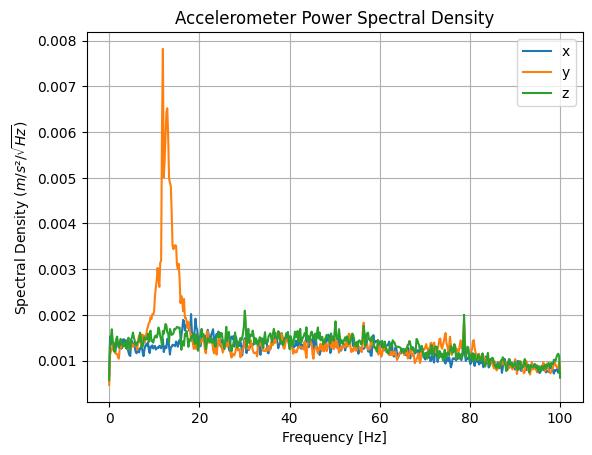

Noise densities (N, acc_n / gyro_n) from PSD for OAKLight_BMI270_90mn_SR200_Static_yUp
gyrX Noise Density: 1.05e-04 rad/s/sqrt(Hz)
gyrY Noise Density: 1.06e-04 rad/s/sqrt(Hz)
gyrZ Noise Density: 1.02e-04 rad/s/sqrt(Hz)
gyr average Noise Density: 1.05e-04 rad/s/sqrt(Hz)
gyr RMS Noise Density: 1.81e-04 rad/s/sqrt(Hz)


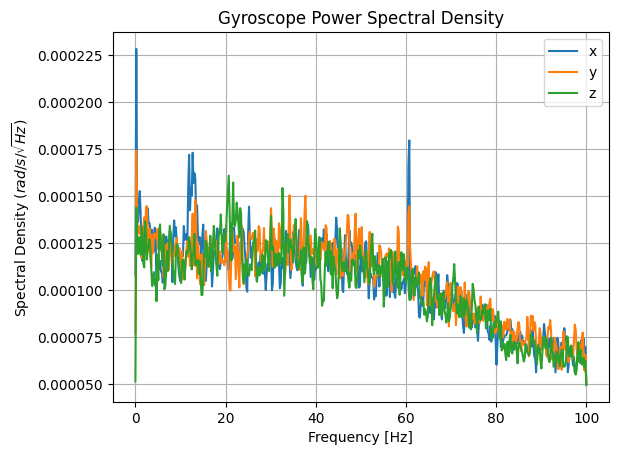

BMI270, Static
acc_n: 1.32e-03 m/s²/sqrt(Hz)
gyr_n: 1.05e-04 rad/s/sqrt(Hz)


In [61]:
MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_90mn_SR200_Static_yUp' 
# MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_30mn_SR200_motorOn_29042024' 
# MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_60mn_SR200_motorOn_03052024' 
# MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_2mn_SR200_CartRolling_yUp'
# MEAS_FILENAME_NO_EXT = 'OAKLight_BMI270_2mn_SR200_FlightManual_yUp'
noise_density_for_config(meas_file_name_no_ext = MEAS_FILENAME_NO_EXT)

In [19]:
acc_xyz,gyro_xyz,FS,FIG_FILENAME_BASE, IMU_NAME,TEST_CONFIG = \
    load_single_meas_file(meas_file_name ='',sample_load_type = 'start',nb_sample_to_load = 24000)

got the sampling rate from filename, FS = 200.0
Input array shape: (720000, 8)
total number of samples in the whole array: 720000
number of samples to use for analysis: 24000


In [2]:
# Load CSV into np array (take few seconds so put in a separate cell)
dataArr = np.genfromtxt(CSV_FILENAME, delimiter=',')

In [3]:
# Separate into arrays and select a slice of the input data
if LOAD_SAMPLE == 'all':
    acc_ts = dataArr[:, 0]  # time stamp for acceleration, second
    accx = dataArr[:, 1]  # m/s²
    accy = dataArr[:, 2]
    accz = dataArr[:, 3]
    ts = dataArr[:, 4]  # time stamp, second
    gx = dataArr[:, 5]  # (rad/s)
    gy = dataArr[:, 6]
    gz = dataArr[:, 7]
elif LOAD_SAMPLE == 'start':
    acc_ts = dataArr[:NB_SAMPLE, 0]  # time stamp for acceleration, second
    accx = dataArr[:NB_SAMPLE, 1]  # m/s²
    accy = dataArr[:NB_SAMPLE, 2]
    accz = dataArr[:NB_SAMPLE, 3]
    ts = dataArr[:NB_SAMPLE, 4]  # time stamp, second
    gx = dataArr[:NB_SAMPLE, 5]  # (rad/s)
    gy = dataArr[:NB_SAMPLE, 6]
    gz = dataArr[:NB_SAMPLE, 7]
elif LOAD_SAMPLE == 'end':
    acc_ts = dataArr[-NB_SAMPLE:, 0]  # time stamp for acceleration, second
    accx = dataArr[-NB_SAMPLE:, 1]  # m/s²
    accy = dataArr[-NB_SAMPLE:, 2]
    accz = dataArr[-NB_SAMPLE:, 3]
    ts = dataArr[-NB_SAMPLE:, 4]  # time stamp, second
    gx = dataArr[-NB_SAMPLE:, 5]  # (rad/s)
    gy = dataArr[-NB_SAMPLE:, 6]
    gz = dataArr[-NB_SAMPLE:, 7]

In [4]:
# get some parameters about the data collection
dataArr_shape = dataArr.shape
tot_nb_sample = dataArr_shape[0]
print(f'Input array shape: {dataArr_shape}')
print(f'total number of samples in the whole array: {tot_nb_sample}')
print(f'number of samples to use for analysis: {len(acc_ts)}')

Input array shape: (720000, 8)
total number of samples in the whole array: 720000
number of samples to use for analysis: 24000


The angular rate sensor is described by the quantities $N$ (angle random walk), $B$ (bias instability) and $K$ (rate random walk) from the IEEE Std 952. The values prescribed here approximate the properties of a Bosch SMI130 yaw rate sensor.

In [5]:
def amplitude_spectrum(measurements_xyz,remove_dc = True, fs_actual = 100, meas_type = 'acc',save_fig = False, fig_name = FIG_FILENAME_BASE):
    # about removing the DC:
    # https://blog.originlab.com/how-to-remove-dc-offset-before-performing-fft
    measx = measurements_xyz[0]
    measy = measurements_xyz[1]
    measz = measurements_xyz[2]
    N = len(measx)  # Number of elements
    print(N)
    DC_RMV = ''
    if remove_dc:
        idx_0 = 1
        measx_dc = measx - np.average(measx)
        measy_dc = measy - np.average(measy)
        measz_dc = measz - np.average(measz)
        DC_RMV = '(NoDC)'
    else:
        idx_0 = 0
        measx_dc = measx
        measy_dc = measy
        measz_dc = measz

    if meas_type == 'acc':
        disp_unit = 'm/s²'
    elif meas_type == 'gyro':
        disp_unit = 'rad/s'
    else:
        disp_unit = 'no unit found'
    idx_0= 0
    print(f'np.average(measx) = {np.average(measx)}')
    
    print(np.average(measy))
    # Compute FFTs
    freqBins = np.linspace(0, fs_actual / 2, N // 2)  # Freq. labels [Hz]
    # FFT of measelerometer data
    fax = np.fft.fft(measx_dc)  
    fay = np.fft.fft(measy_dc)
    faz = np.fft.fft(measz_dc)
    print(f'DC components:{fax[0],fay[0],faz[0]}')
    dccomp = np.zeros(3)
    dccomp[0] = (1 / N) * np.abs(fax[0]) # was 2/N but then Dc component is 2x more than what it should be
    dccomp[1] = (1 / N) * np.abs(fay[0])
    dccomp[2] = (1 / N) * np.abs(faz[0])
    for i in range(3):
        print(f'{dccomp[i]} ', end =" ") 
    print('\n')
    
    # fgx = np.fft.fft(gx)  # FFT of gyro data
    
    # Plot x-measel. FFT
    fig, axmeas = plt.subplots(3,sharex = False) 
    fig.suptitle(f"{meas_type} amp. spectrum {DC_RMV}", fontsize=14)
    axmeas[0].set_title(f'{IMU_NAME} {TEST_CONFIG}')
    axmeas[0].plot(freqBins[idx_0:], (1 / N) * np.abs(fax[idx_0:N // 2]),label = 'meas. X')
    axmeas[1].plot(freqBins[idx_0:], (1 / N) * np.abs(fay[idx_0:N // 2]),label = 'meas. Y')
    axmeas[2].plot(freqBins[idx_0:], (1 / N) * np.abs(faz[idx_0:N // 2]),label = 'meas. Z')
    axmeas[2].set_xlabel('freq (Hz)')
    fig.supylabel(f'amplitude ({disp_unit})')
    for i in range(3):
        axmeas[i].grid()
        axmeas[i].legend()
    # plt.plot(freqBins[0:], (2 / N) * np.abs(fax[0:N // 2]))
    # plt.plot(freqBins[1:], (2 / N) * np.abs(fax[1:N // 2]))
    # plt.title('FFT of X-Accelerometer Data')
    # plt.xlabel('Frequency [Hz]')
    # plt.ylabel('Amplitude')
    # plt.grid()
    
    
    # plt.savefig('motors60mn.png')
    if save_fig:
        figname = f'{meas_type}_AmpFFT_{fig_name}.{FIG_FMT}'
        plt.savefig(figname)
        print(f'figure saved to {figname}')
    plt.show()

24000
np.average(measx) = -0.05727109820833333
9.770452142208335
DC components:((-2.615685446016869e-13+0j), (-2.9471536322489555e-11+0j), (-2.788880237858393e-13+0j))
1.089868935840362e-17  1.2279806801037314e-15  1.1620334324409971e-17  

figure saved to acc_AmpFFT_BMI270_motorOn.svg


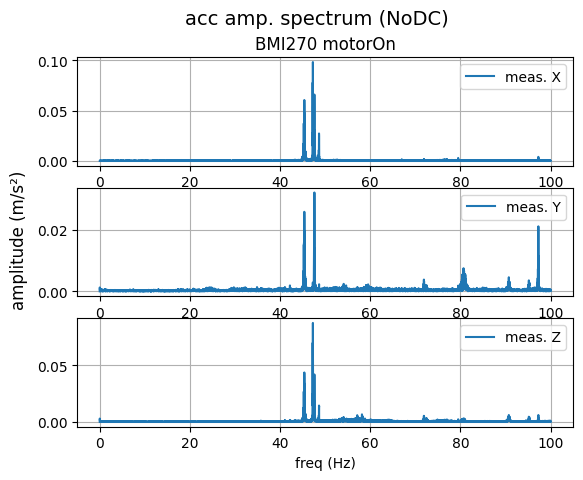

In [20]:
amplitude_spectrum(acc_xyz, fs_actual = FS, meas_type = 'acc',save_fig = False, fig_name = FIG_FILENAME_BASE)

In [21]:
# amplitude_spectrum((accx,accy,accz), fs_actual = FS, meas_type = 'acc',save_fig = False, fig_name = FIG_FILENAME_BASE)

## Analysis using the Welsh Method

Get the noise density or white noise (in Kalibr or VINS) or integrated rate random walk.
Integrated rate for acceleration is velocity and for angular rate it's angle.
Noted N.



In [43]:
def noise_density_N(measurements_xyz, fs_actual = 100, meas_type = 'acc',save_fig = False, fig_name = FIG_FILENAME_BASE):
    measx = measurements_xyz[0]
    measy = measurements_xyz[1]
    measz = measurements_xyz[2]
    scale_meas_psd = 1
    if meas_type == 'acc':
        sensor_full_name =  'Accelerometer'
        if ACCELERATION_UNIT_FOR_NOISE == 'm/s²':
            scale_meas_psd = 1
            meas_noise_density_unit = 'm/s²/sqrt(Hz)'
            meas_ylabel = r'Spectral Density ($m/s²  / \sqrt{Hz}$)'
        elif ACCELERATION_UNIT_FOR_NOISE == 'ug':
            scale_meas_psd = MS2_TO_MICROG
            meas_noise_density_unit = r'Spectral Density  $\mu g  / \sqrt{Hz}$'# 'ug/sqrt(Hz)'
            meas_ylabel = r'Spectral Density  $\mu g  / \sqrt{Hz}$'
    if meas_type == 'gyr':
        sensor_full_name =  'Gyroscope'
        if ANGLE_UNIT_FOR_NOISE == 'rad':
            scale_meas_psd = 1
            meas_noise_density_unit = 'rad/s/sqrt(Hz)'
            meas_ylabel = r'Spectral Density ($rad/s  / \sqrt{Hz}$)'
        elif ANGLE_UNIT_FOR_NOISE == 'deg':
            scale_meas_psd = RAD_2_DEG
            meas_noise_density_unit = '°/s/sqrt(Hz)'
            meas_ylabel = r'Spectral Density ($°/s  / \sqrt{Hz}$)'
    print(f'Noise densities (N, acc_n / gyro_n) from PSD for {MEAS_FILENAME_NO_EXT}')
    

    freqax, psdax = signal.welch(measx, fs_actual, nperseg=1024, scaling='density')  
    freqay, psday = signal.welch(measy, fs_actual, nperseg=1024, scaling='density')  
    freqaz, psdaz = signal.welch(measz, fs_actual, nperseg=1024, scaling='density')  
    
    # scale depending on target units
    psdax = np.sqrt(psdax) * scale_meas_psd
    psday = np.sqrt(psday) * scale_meas_psd
    psdaz = np.sqrt(psdaz) * scale_meas_psd
    
    # Compute noise spectral densities
    ndax = np.mean(psdax)
    nday = np.mean(psday)
    ndaz = np.mean(psdaz)
    ndaxyz_avg = (ndax+nday+ndaz)/3
    ndaxyz_rms = np.sqrt(ndax*ndax+nday*nday+ndaz*ndaz)
    print(f'{meas_type}X Noise Density: {ndax:.{PRECI}{TYPE}} {meas_noise_density_unit}')
    print(f'{meas_type}Y Noise Density: {nday:.{PRECI}{TYPE}} {meas_noise_density_unit}')
    print(f'{meas_type}Z Noise Density: {ndaz:.{PRECI}{TYPE}} {meas_noise_density_unit}')
    print(f'{meas_type} average Noise Density: {ndaxyz_avg:.{PRECI}{TYPE}} {meas_noise_density_unit}')
    print(f'{meas_type} RMS Noise Density: {ndaxyz_rms:.{PRECI}{TYPE}} {meas_noise_density_unit}')
    
       
    # Plot measel. data
    plt.figure()
    plt.plot(freqax, psdax, label='x')
    plt.plot(freqay, psday, label='y')
    plt.plot(freqaz, psdaz, label='z')
    plt.title(f'{sensor_full_name} Power Spectral Density')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel(meas_ylabel)
    plt.legend()
    plt.grid()
    if save_fig:
        figname = f'{meas_type}_PSD_Welch_{FIG_FILENAME_BASE}.{FIG_FMT}'
        plt.savefig(figname)
        print(f'figure saved to {figname}')
    
    plt.show()
    return ndaxyz_avg


Noise densities (N, acc_n / gyro_n) from PSD for OAKLight_BMI270_60mn_SR200_motorOn_03052024
accX Noise Density: 9.90e-03 m/s²/sqrt(Hz)
accY Noise Density: 9.04e-03 m/s²/sqrt(Hz)
accZ Noise Density: 1.10e-02 m/s²/sqrt(Hz)
acc average Noise Density: 9.99e-03 m/s²/sqrt(Hz)
acc RMS Noise Density: 1.74e-02 m/s²/sqrt(Hz)


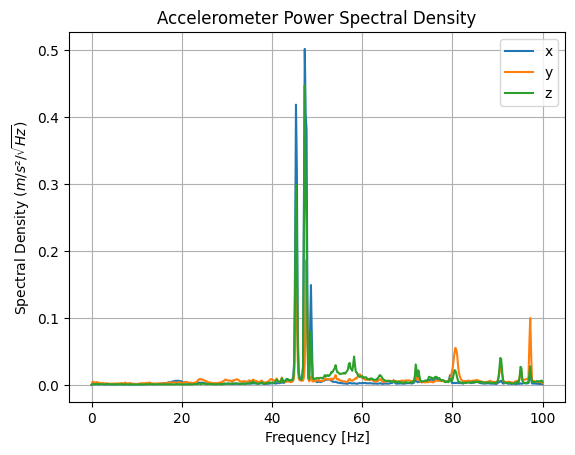

In [42]:
nd_acc_avg = noise_density_N(acc_xyz, fs_actual = FS, meas_type = 'acc',save_fig = False, fig_name = FIG_FILENAME_BASE)

In [23]:
# noise_density_N((accx,accy,accz), fs_actual = FS, meas_type = 'acc',save_fig = False, fig_name = FIG_FILENAME_BASE)

Noise densities (N, acc_n / gyro_n) from PSD for OAKLight_BMI270_60mn_SR200_motorOn_03052024
gyroX Noise Density: 4.79e-04 rad/s/sqrt(Hz)
gyroY Noise Density: 6.44e-04 rad/s/sqrt(Hz)
gyroZ Noise Density: 3.51e-04 rad/s/sqrt(Hz)
gyro average Noise Density: 4.92e-04 rad/s/sqrt(Hz)
gyro RMS Noise Density: 8.76e-04 rad/s/sqrt(Hz)


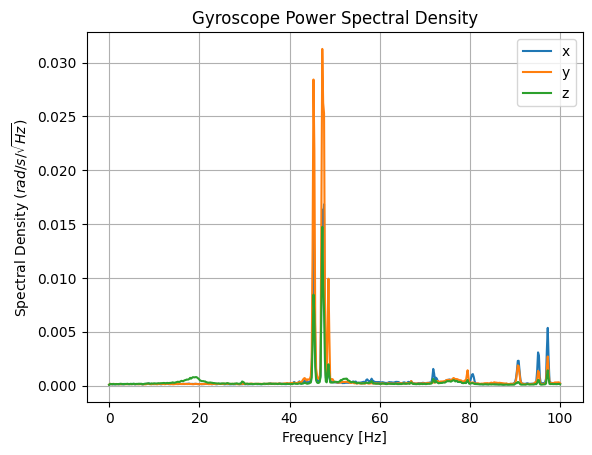

In [37]:
nd_gyr_avg = noise_density_N(gyro_xyz, fs_actual = FS, meas_type = 'gyro',save_fig = False, fig_name = FIG_FILENAME_BASE)
# noise_density_N((gx,gy,gz), fs_actual = FS, meas_type = 'gyro',save_fig = False, fig_name = FIG_FILENAME_BASE)

In [38]:
print(f'acc_n: {nd_acc_avg:.{PRECI}{TYPE}} m/s²/sqrt(Hz)')
print(f'gyr_n: {nd_gyr_avg:.{PRECI}{TYPE}} rad/s/sqrt(Hz)')

acc_n: 9.99e-03 m/s²/sqrt(Hz)
gyr_n: 4.92e-04 rad/s/sqrt(Hz)


In [3]:
# Load CSV into np array (take few seconds so put in a separate cell)
dataArr_1 = np.genfromtxt(CSV_FILENAME_1, delimiter=',')
dataArr_2 = np.genfromtxt(CSV_FILENAME_2, delimiter=',')

In [4]:
# Separate into arrays and select a slice of the input data
if LOAD_SAMPLE == 'all':
    acc_ts = dataArr[:, 0]  # time stamp for acceleration, second
    accx = dataArr[:, 1]  # m/s²
    accy = dataArr[:, 2]
    accz = dataArr[:, 3]
    ts = dataArr[:, 4]  # time stamp, second
    gx = dataArr[:, 5]  # (rad/s)
    gy = dataArr[:, 6]
    gz = dataArr[:, 7]
elif LOAD_SAMPLE == 'start':
    acc_ts = dataArr[:NB_SAMPLE, 0]  # time stamp for acceleration, second
    accx = dataArr[:NB_SAMPLE, 1]  # m/s²
    accy = dataArr[:NB_SAMPLE, 2]
    accz = dataArr[:NB_SAMPLE, 3]
    ts = dataArr[:NB_SAMPLE, 4]  # time stamp, second
    gx = dataArr[:NB_SAMPLE, 5]  # (rad/s)
    gy = dataArr[:NB_SAMPLE, 6]
    gz = dataArr[:NB_SAMPLE, 7]
elif LOAD_SAMPLE == 'end':
    acc_ts = dataArr[-NB_SAMPLE:, 0]  # time stamp for acceleration, second
    accx = dataArr[-NB_SAMPLE:, 1]  # m/s²
    accy = dataArr[-NB_SAMPLE:, 2]
    accz = dataArr[-NB_SAMPLE:, 3]
    ts = dataArr[-NB_SAMPLE:, 4]  # time stamp, second
    gx = dataArr[-NB_SAMPLE:, 5]  # (rad/s)
    gy = dataArr[-NB_SAMPLE:, 6]
    gz = dataArr[-NB_SAMPLE:, 7]

In [5]:
if ANGLE_UNIT_FOR_NOISE == 'deg':
    gx = gx * (180.0 / np.pi)  # [deg/s]
    gy = gy * (180.0 / np.pi)
    gz = gz * (180.0 / np.pi)
